# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [5]:
customers.head()

missing_data = customers.isnull().sum()

missing_data

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [11]:
categorical_cols = customers.select_dtypes(include=['object']).columns

categorical_cols

correlation_matrix = customers.corr()

correlation_matrix

customers.describe()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


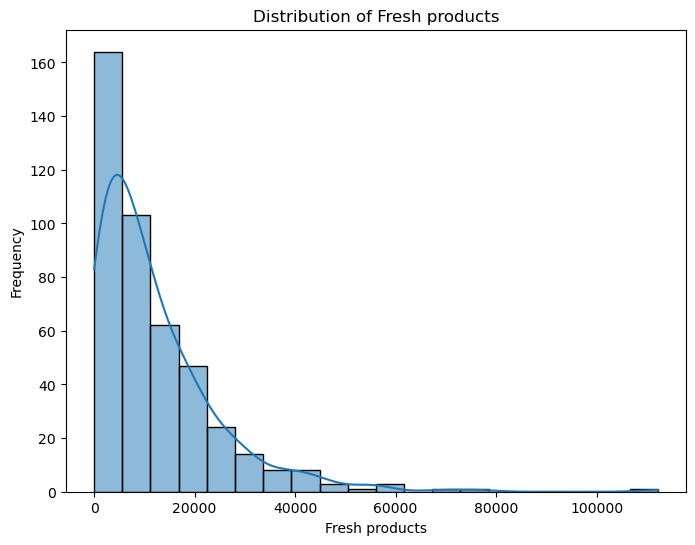

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(customers['Fresh'], bins=20, kde=True)
plt.title('Distribution of Fresh products')
plt.xlabel('Fresh products')
plt.ylabel('Frequency')
plt.show()

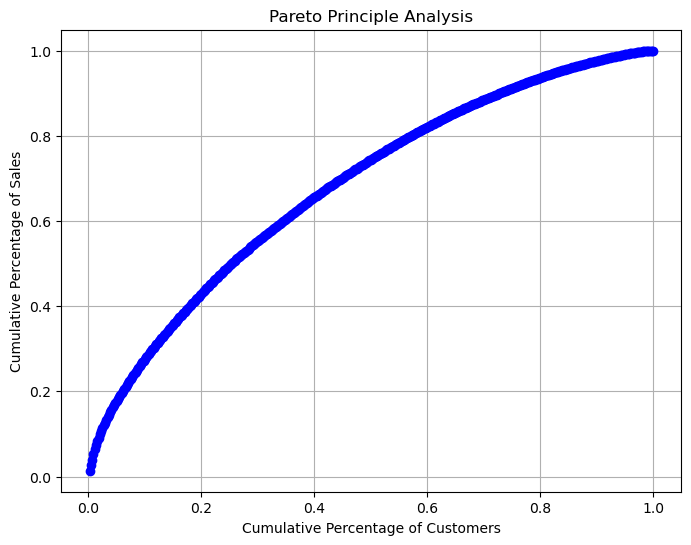

In [14]:
total_sales = customers.sum(axis=1)
cumulative_sales = total_sales.sort_values(ascending=False).cumsum() / total_sales.sum()


num_customers = len(customers)
cumulative_customers = pd.Series(range(1, num_customers + 1)) / num_customers

plt.figure(figsize=(8, 6))
plt.plot(cumulative_customers, cumulative_sales, marker='o', linestyle='--', color='b')
plt.title('Pareto Principle Analysis')
plt.xlabel('Cumulative Percentage of Customers')
plt.ylabel('Cumulative Percentage of Sales')
plt.grid(True)
plt.show()

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [21]:
categorical_cols = customers.select_dtypes(include=['object']).columns

categorical_cols

correlation_matrix = customers.corr()

correlation_matrix


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [25]:
cumulative_customers

0      0.002273
1      0.004545
2      0.006818
3      0.009091
4      0.011364
         ...   
435    0.990909
436    0.993182
437    0.995455
438    0.997727
439    1.000000
Length: 440, dtype: float64

In [30]:
customers_cleaned

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


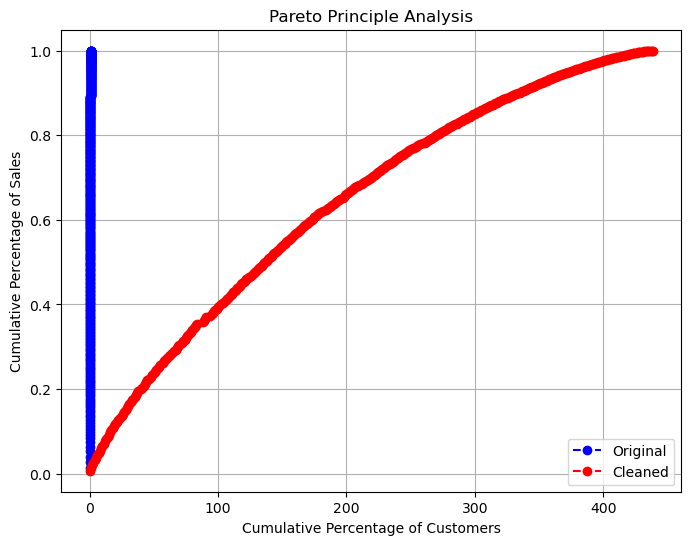

In [31]:
total_sales_cleaned = customers_cleaned.sum(axis=1)


total_sales_sorted = total_sales_cleaned.sort_values(ascending=False)


cumulative_sales_cleaned = total_sales_sorted.cumsum() / total_sales_sorted.sum()

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(cumulative_customers, cumulative_sales, marker='o', linestyle='--', color='b', label='Original')
plt.plot(customers_cleaned.index, cumulative_sales_cleaned, marker='o', linestyle='--', color='r', label='Cleaned')
plt.title('Pareto Principle Analysis')
plt.xlabel('Cumulative Percentage of Customers')
plt.ylabel('Cumulative Percentage of Sales')
plt.legend()
plt.grid(True)
plt.show()

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


customers_scale = scaler.fit_transform(customers)


customers_scale = pd.DataFrame(customers_scale, columns=customers.columns)


customers_scale.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [33]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(customers_scale)

cluster_labels = kmeans.labels_

customers['labels'] = cluster_labels

customers.head()

c:\Users\joaop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


Count the values in `labels`.

In [35]:
label_counts = customers['labels'].value_counts()

label_counts

labels
1    297
0    130
2     13
Name: count, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [36]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5)

dbscan.fit(customers_scale)

dbscan_labels = dbscan.labels_

customers['labels_DBSCAN'] = dbscan_labels

customers.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,0,-1
1,2,3,7057,9810,9568,1762,3293,1776,0,-1
2,2,3,6353,8808,7684,2405,3516,7844,0,-1
3,1,3,13265,1196,4221,6404,507,1788,1,1
4,2,3,22615,5410,7198,3915,1777,5185,0,-1


Count the values in `labels_DBSCAN`.

In [38]:
label_counts_DBSCAN = customers['labels_DBSCAN'].value_counts()

label_counts_DBSCAN


labels_DBSCAN
-1    255
 1    130
 5     22
 4      7
 6      6
 0      5
 3      5
 2      5
 7      5
Name: count, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

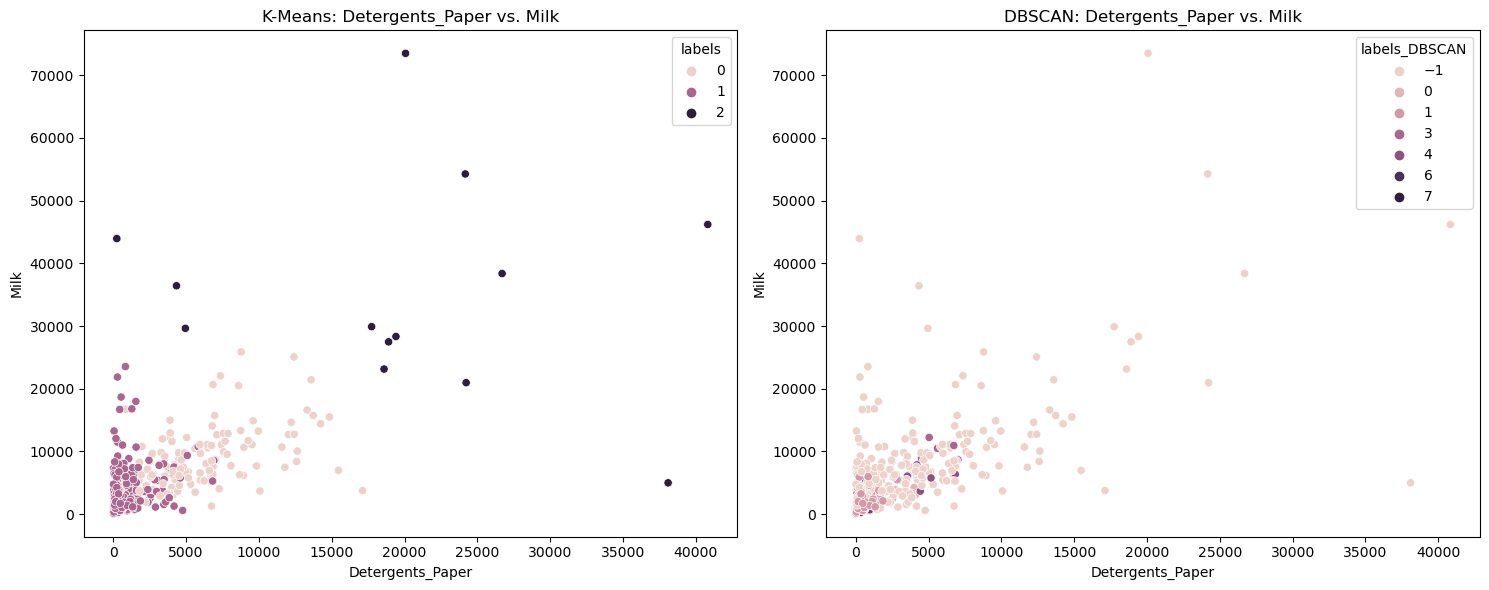

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(x='Detergents_Paper', y='Milk', hue='labels', data=customers, ax=axs[0])
axs[0].set_title('K-Means: Detergents_Paper vs. Milk')

sns.scatterplot(x='Detergents_Paper', y='Milk', hue='labels_DBSCAN', data=customers, ax=axs[1])
axs[1].set_title('DBSCAN: Detergents_Paper vs. Milk')

plt.tight_layout()
plt.show()

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

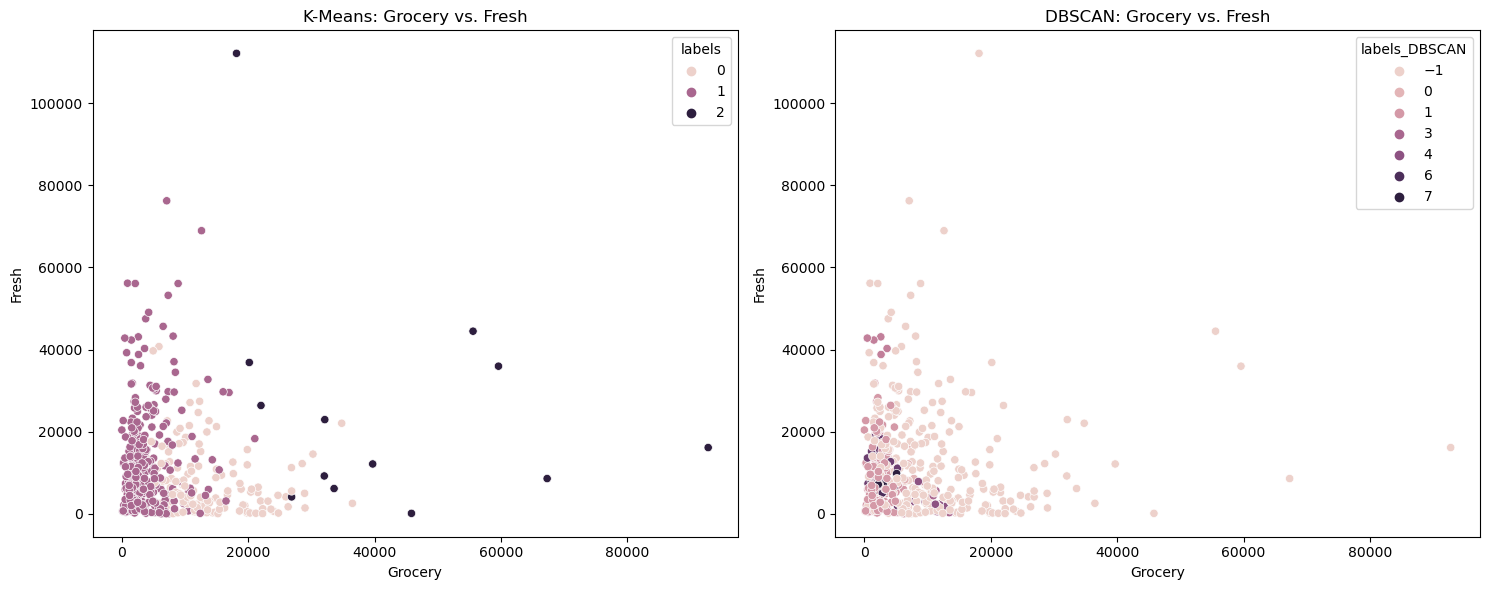

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(x='Grocery', y='Fresh', hue='labels', data=customers, ax=axs[0])
axs[0].set_title('K-Means: Grocery vs. Fresh')

sns.scatterplot(x='Grocery', y='Fresh', hue='labels_DBSCAN', data=customers, ax=axs[1])
axs[1].set_title('DBSCAN: Grocery vs. Fresh')

plt.tight_layout()
plt.show()

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

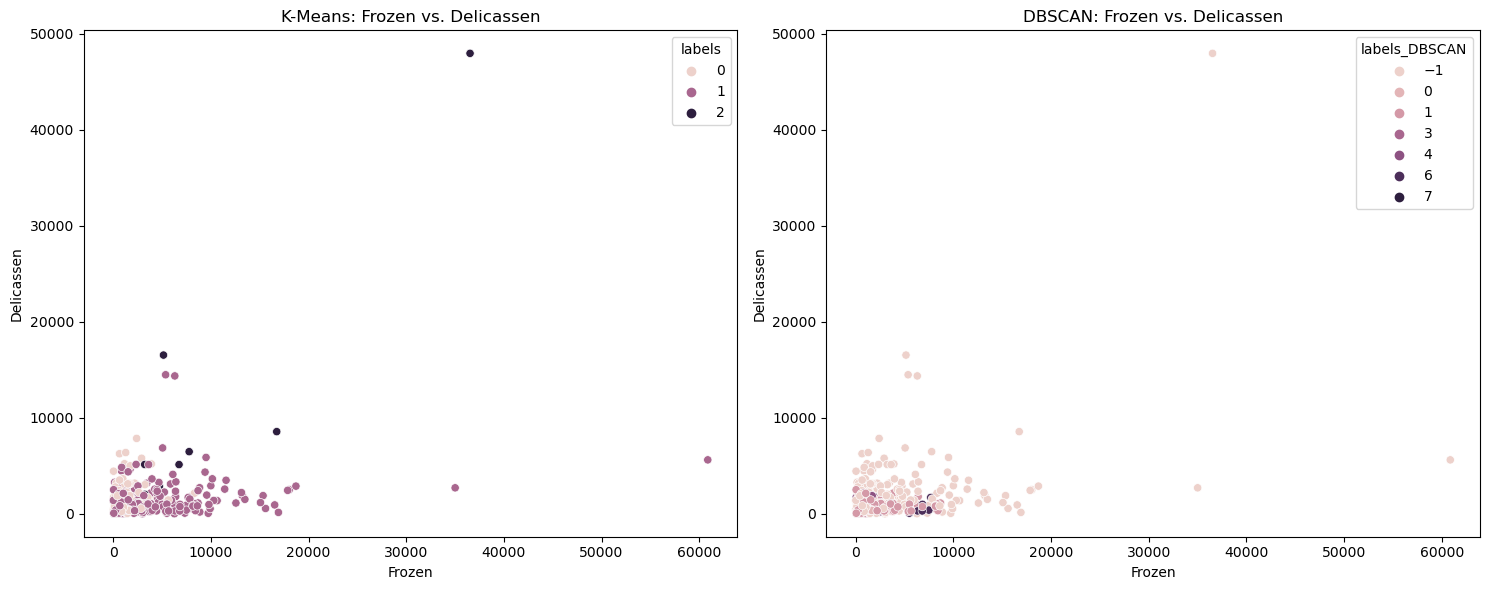

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(x='Frozen', y='Delicassen', hue='labels', data=customers, ax=axs[0])
axs[0].set_title('K-Means: Frozen vs. Delicassen')

sns.scatterplot(x='Frozen', y='Delicassen', hue='labels_DBSCAN', data=customers, ax=axs[1])
axs[1].set_title('DBSCAN: Frozen vs. Delicassen')

plt.tight_layout()
plt.show()

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [45]:
means_by_labels = customers.groupby('labels').mean()

means_by_labels_DBSCAN = customers.groupby('labels_DBSCAN').mean()

print("Means by K-Means labels:")
print(means_by_labels)

print("\nMeans by DBSCAN labels:")
means_by_labels_DBSCAN


Means by K-Means labels:
         Channel    Region         Fresh          Milk       Grocery  \
labels                                                                 
0       2.000000  2.623077   8165.915385   8748.515385  13905.492308   
1       1.003367  2.505051  13075.898990   3218.737374   3855.696970   
2       1.846154  2.615385  25770.769231  35160.384615  41977.384615   

             Frozen  Detergents_Paper   Delicassen  labels_DBSCAN  
labels                                                             
0       1441.630769       5991.146154  1535.007692      -0.538462  
1       3620.400673        776.875421  1242.249158       0.646465  
2       6844.538462      19867.384615  7880.307692      -1.000000  

Means by DBSCAN labels:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,,,
-1,1.490196,2.45098,13729.564706,8359.886275,11484.364706,3795.003922,4356.800000,2080.470588,0.607843
0,2.000000,3.00000,11401.000000,3536.200000,6729.000000,720.200000,3561.000000,258.200000,0.000000
1,1.000000,3.00000,9128.823077,1862.438462,2423.530769,2131.430769,496.576923,741.946154,1.000000
2,1.000000,3.00000,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,1.000000
3,2.000000,3.00000,2357.200000,10224.800000,11862.800000,609.600000,5780.000000,572.800000,0.000000
4,2.000000,3.00000,3068.142857,6095.857143,10355.000000,994.000000,4675.571429,1826.428571,0.000000
5,1.000000,1.00000,9837.863636,1751.863636,2161.681818,1513.181818,333.954545,669.045455,1.000000
6,1.000000,1.00000,6823.000000,1943.000000,2372.666667,6780.333333,386.500000,613.666667,1.000000
7,1.000000,2.00000,7494.600000,1537.600000,3383.000000,2575.400000,227.400000,941.000000,1.000000


Which algorithm appears to perform better?

In [ ]:
# Your observations here

# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

c:\Users\joaop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\joaop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\joaop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\joaop\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

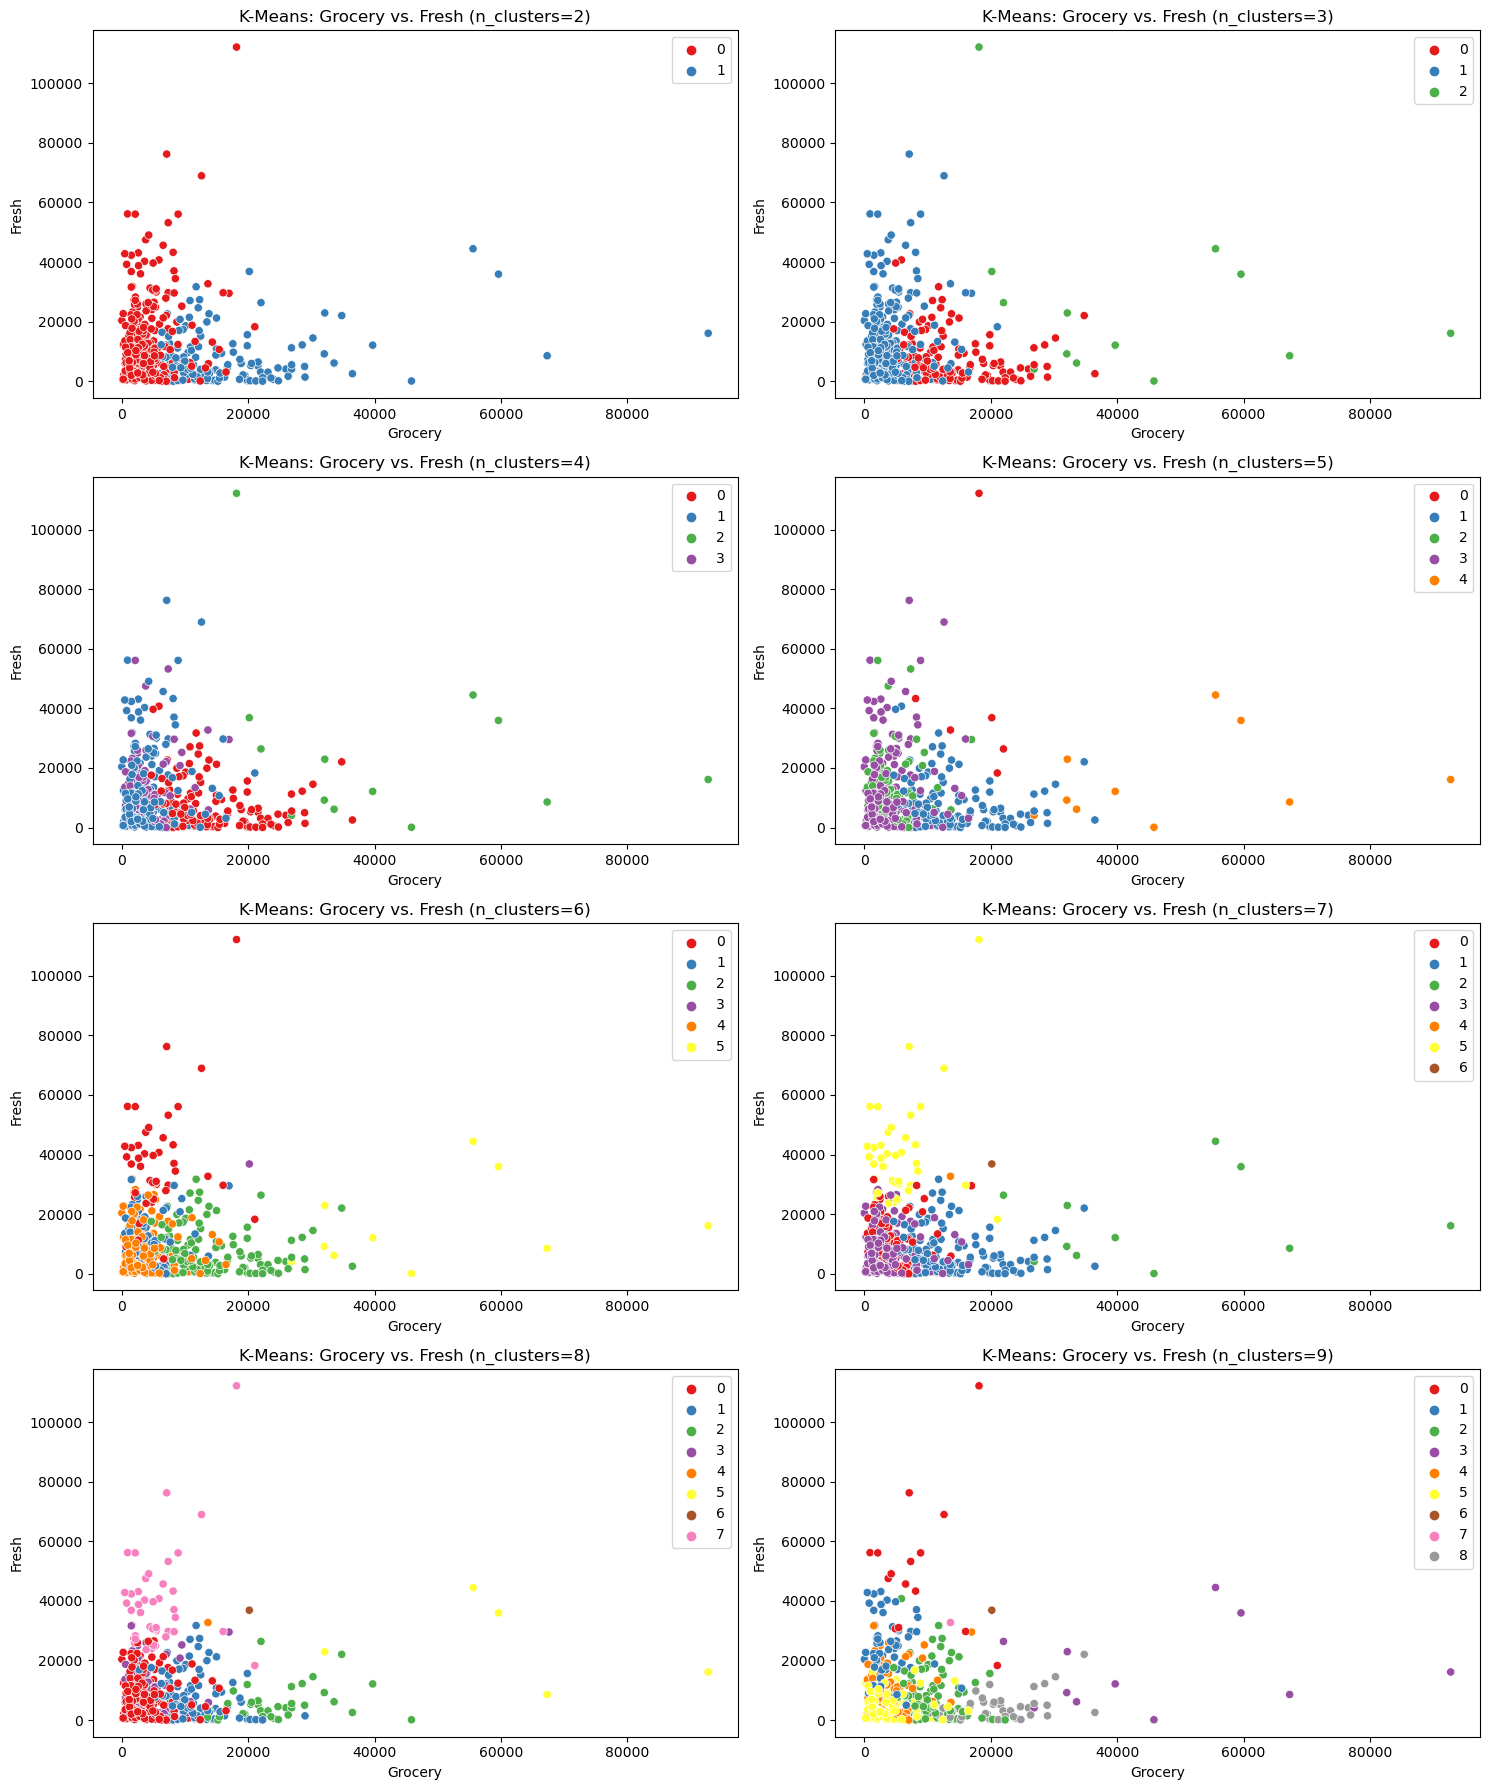

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

n_clusters_range = range(2, 10)
fig, axs = plt.subplots(len(n_clusters_range) // 2 + len(n_clusters_range) % 2, 2, figsize=(15, 18))

axs = axs.flatten()

for i, n_clusters in enumerate(n_clusters_range):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    kmeans.fit(customers_scale)
    
    cluster_labels = kmeans.labels_
    
    sns.scatterplot(x='Grocery', y='Fresh', hue=cluster_labels, palette='Set1', data=customers, ax=axs[i])
    axs[i].set_title(f'K-Means: Grocery vs. Fresh (n_clusters={n_clusters})')
    axs[i].legend(loc='upper right')
    axs[i].set_xlabel('Grocery')
    axs[i].set_ylabel('Fresh')

plt.tight_layout()
plt.show()

In [ ]:
# Your comment here

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here